## **Final Project 2: Logistic Regression and SVM**

This project was created to fulfill the assignment of The Introduction of Python for Data Science Course

### **Our Members** ###

- Caesariansyah Dwi Fadhilah
- Muhammad Reza Pahlevi

## **A. Introduction** 

 Understanding and accurately predicting weather conditions are pivotal for various aspects of our daily lives, impacting everything from outdoor plans to agricultural practices. In this context. Australia's climate varies greatly across its eight states and territories. Most of Australia has four seasons, while the dry and wet seasons take place in the tropical regions in the north of the continent. Because the country is so large, the climate in Australia differs greatly from region to region. In general, there are four seasons in most of the country, while the Top End (including Darwin, Katherine, Kakadu and Arnhem Land), Broome, Kimberley and Tropical North Queensland (Cairns, Whitsundays and Daintree Rainforest) experience a 'wet season' (November to April) and a 'dry season' (May to October). The wet season in northern Australia is characterized by very hot days, high humidity, monsoon rains and possibly cyclones, but also by its own charms.

 There fore,  we delve into a dataset spanning around 10 years, collecting daily weather observations from diverse locations across Australia. The primary objective is to predict next-day rain using classification models trained on the target variable, "RainTomorrow." This variable serves as the linchpin for prediction, addressing a straightforward yet impactful question: did it rain the next day, with responses categorized as "Yes" or "No"? Notably, the column is marked as "Yes" if the recorded rainfall on that day measures 1mm or more.

 To facilitate this investigation, a dataset sourced from Kaggle is utilized, containing information extracted from predicting next-day rain in Australia. This dataset consists of 145,460 rows and 23 columns.


## **B. Import Libraries**

The libraries are needed to build a linear regression model include numpy. sympy, seaborn, matplotlib, dython nominal, joblib, sklearn, and pickie.

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling
import numpy as np
import sympy as sp
import pandas as pd
from dython.nominal import associations
import missingno as msno

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import pickle
from pickle import dump,load

#set max columns to none
pd.set_option('display.max_columns', None)

## **C. Data Loading**

### **Import Dataset**

Import weatherAUS.csv as *df*. And the required of dataset will be read by the program.

In [2]:
df = pd.read_csv("weatherAUS.csv",parse_dates=['Date'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Display the number of rows and columns.

In [3]:
df.shape

(145460, 23)

### **Type of Data**

Display summary information about the DataFrame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Summary of descriptive statistics from DataFrame

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,145460,2013-04-04 21:08:51.907053568,2007-11-01 00:00:00,2011-01-11 00:00:00,2013-06-02 00:00:00,2015-06-14 00:00:00,2017-06-25 00:00:00,NaN
MinTemp,143975.0,12.194034,-8.5,7.6,12.0,16.9,33.9,6.398495
MaxTemp,144199.0,23.221348,-4.8,17.9,22.6,28.2,48.1,7.119049
Rainfall,142199.0,2.360918,0.0,0.0,0.0,0.8,371.0,8.47806
Evaporation,82670.0,5.468232,0.0,2.6,4.8,7.4,145.0,4.193704
Sunshine,75625.0,7.611178,0.0,4.8,8.4,10.6,14.5,3.785483
WindGustSpeed,135197.0,40.03523,6.0,31.0,39.0,48.0,135.0,13.607062
WindSpeed9am,143693.0,14.043426,0.0,7.0,13.0,19.0,130.0,8.915375
WindSpeed3pm,142398.0,18.662657,0.0,13.0,19.0,24.0,87.0,8.8098
Humidity9am,142806.0,68.880831,0.0,57.0,70.0,83.0,100.0,19.029164


Descriptive statistics specific to object columns

In [6]:
df.describe(include='object').T

,count,unique,top,freq
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


Check Duplicated of Data

In [7]:
df.duplicated().sum()

0

## **D. Data Cleaning**

### **Drop Columns with High Missing Values**

In [8]:
df.isnull().mean().sort_values(ascending=False)

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64

As it can be seen from the missing values above, sunshine, evaporation, cloud3pm, and cloud9am features have lots of NaN values. Replacing those might increase the inaccuracy of the dataset. Thus, those features can be dropped instead. Furthermore, date feature can be dropped as well because this isn't a time series analysis.

In [9]:
df.drop(df[['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']], axis=1, inplace=True)

we also see missing values in our target variabel or "RainTomorrow" column, we will drop those rows

In [10]:
df = df.dropna(subset = ['RainTomorrow'])
df.shape

(142193, 19)

for the rest of the missing values, we will replace it later with median values

## **E. Exploration Data Analysis**

Percentage of tomorrow will be rain, based on rain today

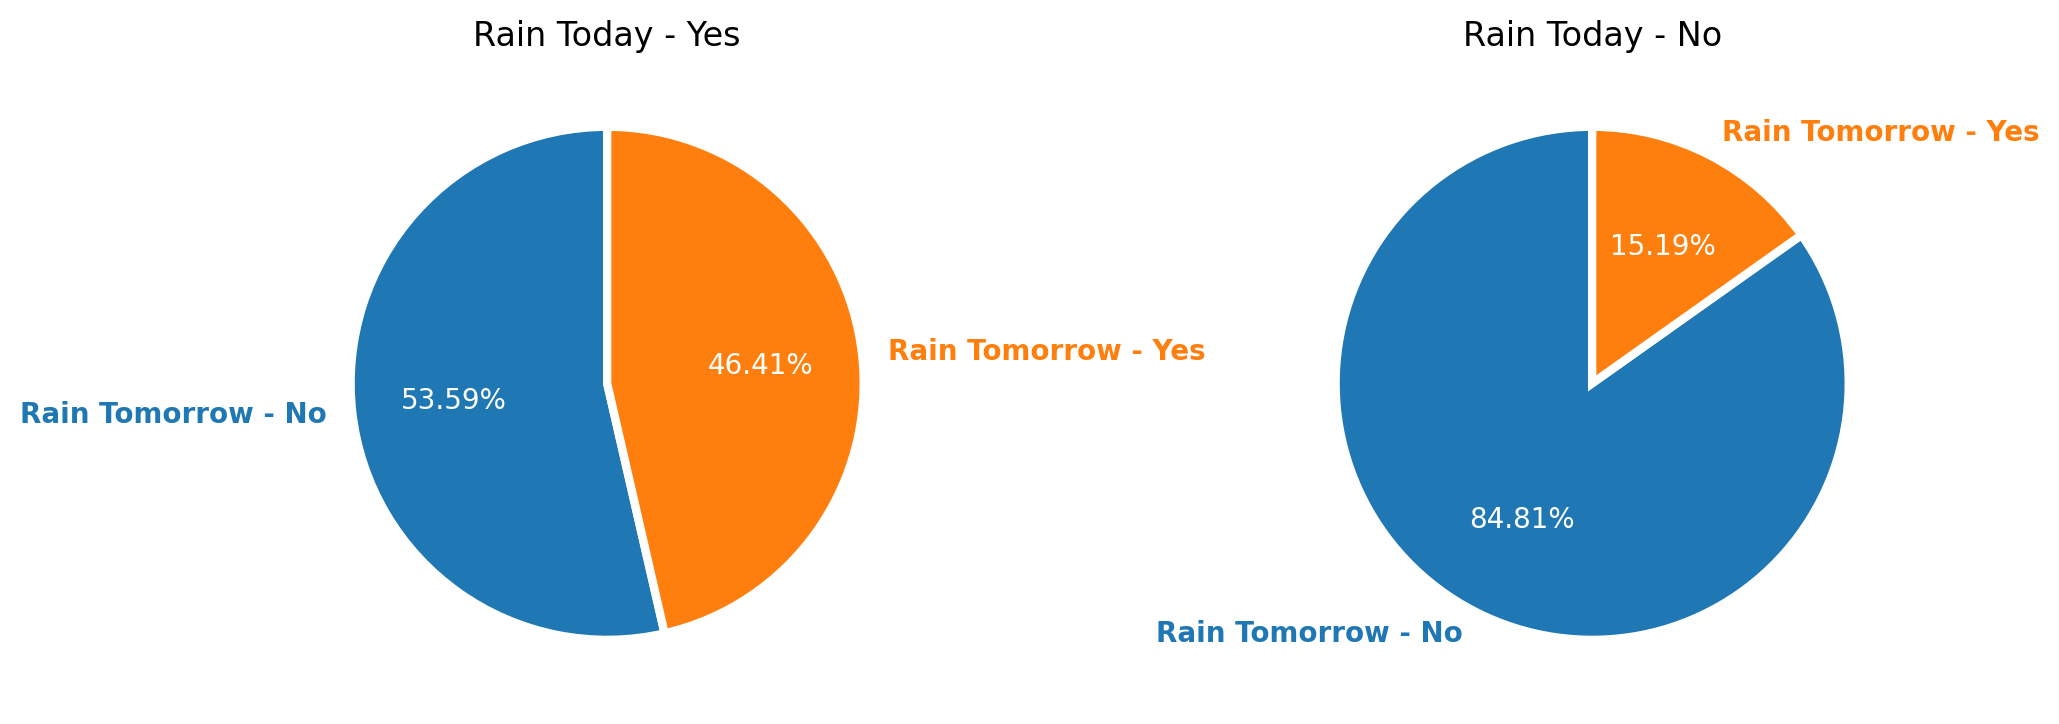

In [11]:
nrows,ncols = 1,2
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols)

for i,j in zip(range(ncols),["Yes","No"]):
    patches,texts,pcts = ax[i].pie(
        np.ravel(df.groupby(["RainToday","RainTomorrow"]).count()[["Location"]].loc[j].values),
        labels=["Rain Tomorrow - No","Rain Tomorrow - Yes"],
        startangle=90,
        autopct="%.2f%%",
        wedgeprops={"linewidth":3.0,"edgecolor":"white"},
    )
    for k,patch in enumerate(patches):
        texts[k].set_color(patch.get_facecolor())

    plt.setp(pcts,color="white")
    plt.setp(texts,fontweight=600)

    ax[i].set_title(f"Rain Today - {j}")
    
plt.tight_layout()
plt.show()

Calculates the percentage of rain tomorrow based on whether or not it rained today. It can be seen in the pie chart above that if it is raining today, the chance of rain tomorrow is higher than if it is not raining today. Vice versa, if it is not raining today, the chance of it not raining tomorrow is higher than if it is raining today.

### **Rainfall Distribution in Each Season**

In [12]:
# Create get_season function as follows:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Create column season that includes apply function get_season to the column Date Month 
df_tmp = df.copy()
df_tmp['Season'] = df_tmp['Date'].dt.month.apply(get_season)

Text(0.5, 1.0, 'Rainfall Distribution in Each Season')

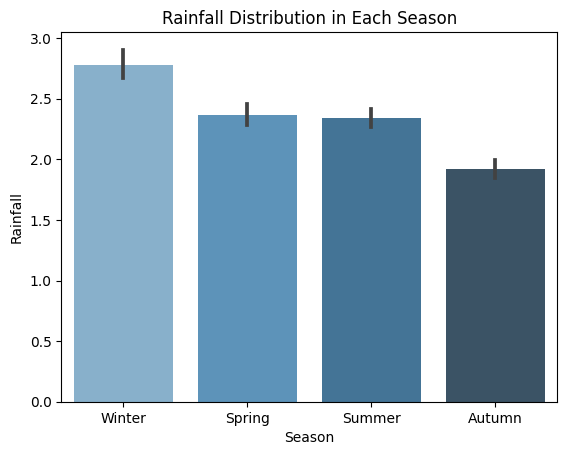

In [13]:
sns.barplot(x='Season', y='Rainfall', data=df_tmp, palette='Blues_d')
plt.title("Rainfall Distribution in Each Season")

From the bar chart above, it can be seen that the highest rainfall distribution is in the summer season of 7554.4 mm, followed by spring (7178.2 mm), autumn (6169.9), then winter (5829.7 mm).

### **Hows the Humidity at 9am and 3pm in 4 years (2014-2017)**

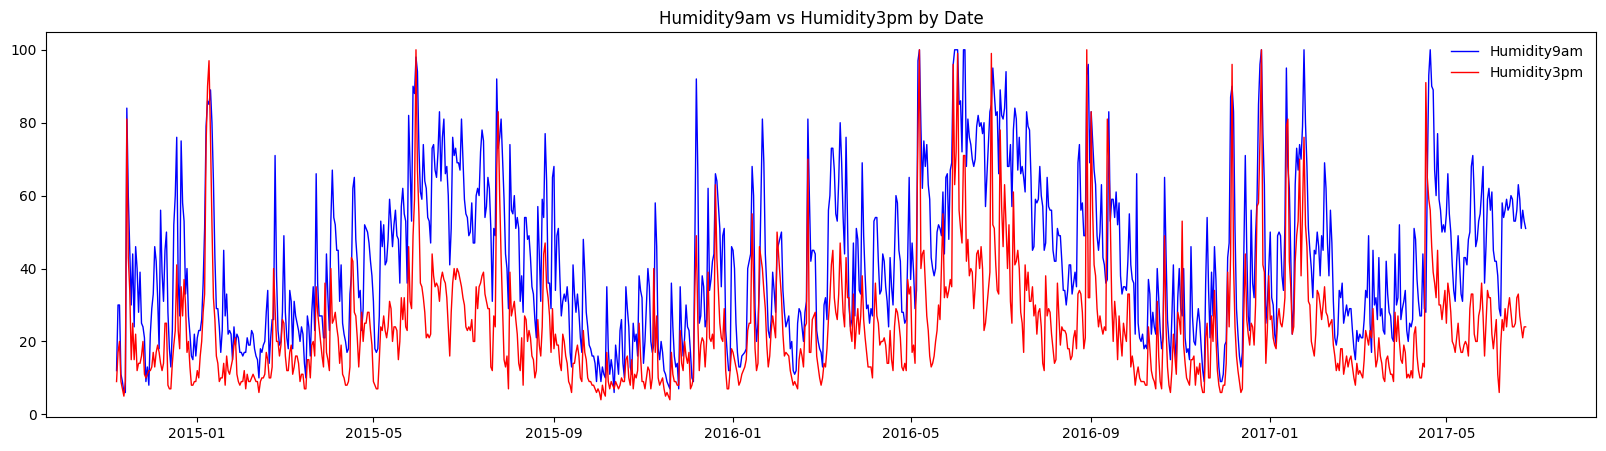

In [14]:
# Humadity visualization based on date
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Humidity9am'],color='blue',linewidth=1, label= 'Humidity9am')
plt.plot(df_dateplot['Date'],df_dateplot['Humidity3pm'],color='red',linewidth=1, label= 'Humidity3pm')
# plt.fill_between(df_dateplot['Date'],df_dateplot['Humidity9am'],df_dateplot['Humidity3pm'], facecolor = '#EBF78F')
plt.title('Humidity9am vs Humidity3pm by Date')
plt.legend(loc='upper right', frameon=False)
plt.show()

From the visualization results above, it can be seen that there is a difference between the humidity at 9 am and 3 pm, where the humidity at 9 am tends to be higher than the humidity at 3 pm. It can also be seen that the humidity is high around June-July.

### **Which location has the most Minimum and Maximum Temperature**

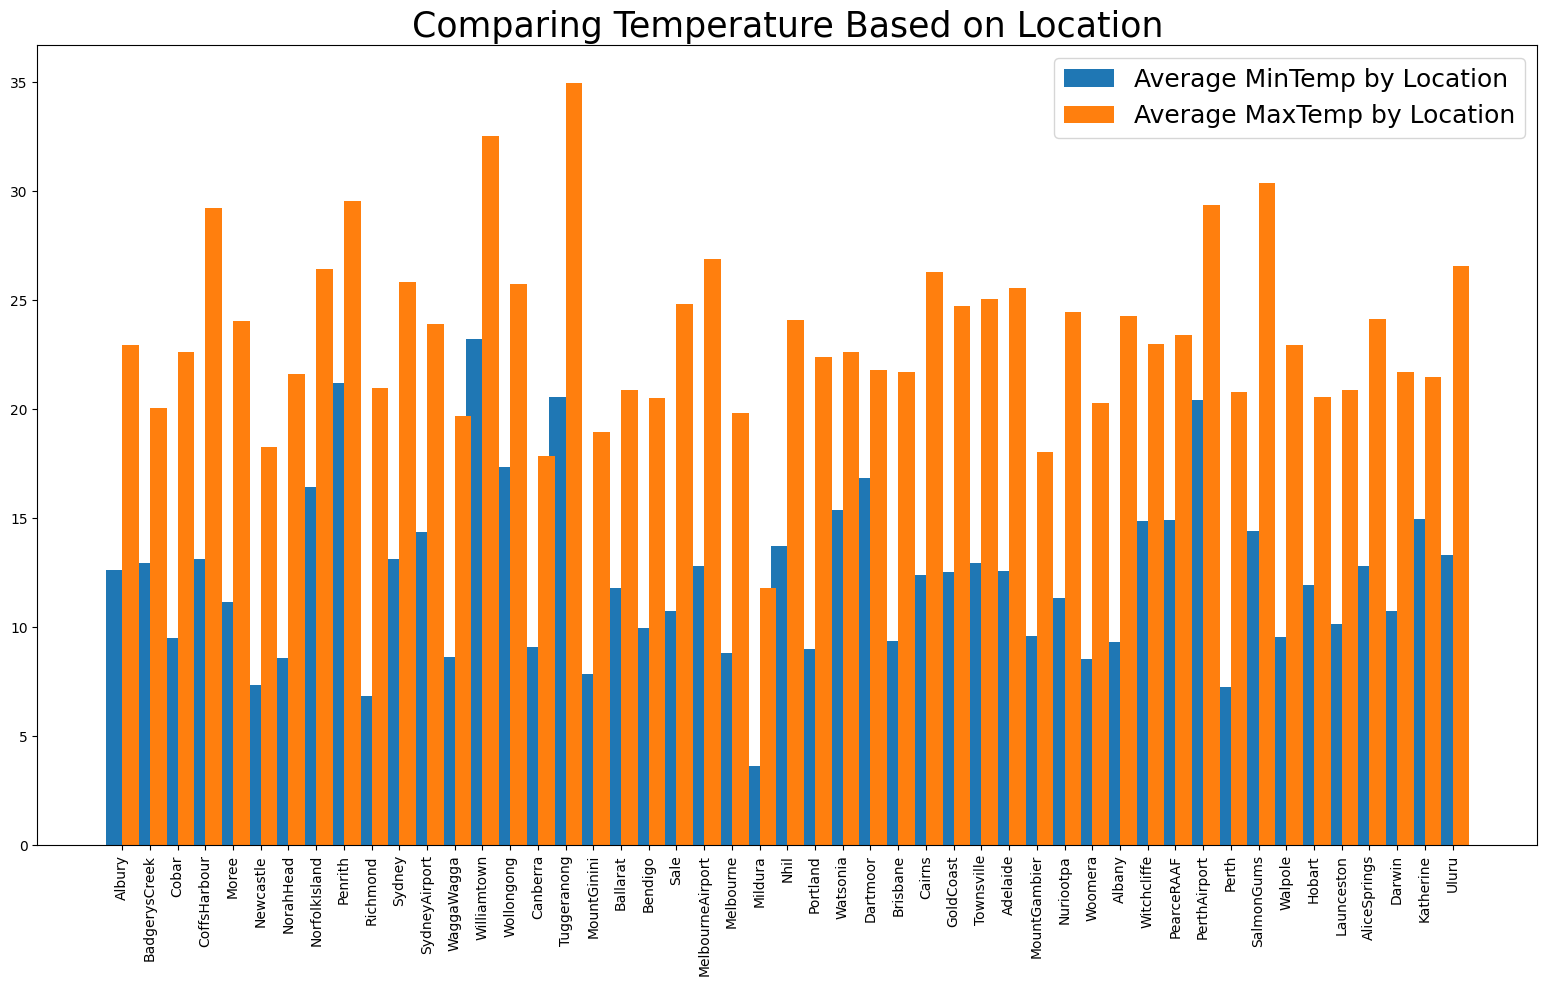

In [15]:
# Compare the Temperature based on Location
a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (15,8)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
w = 0.6

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)
plt.title("Comparing Temperature Based on Location", fontsize=25)
plt.legend(fontsize=18)
plt.show()

Based on the visualization results, it can be seen that the location with the lowest temperature in Mildura while the highest temperature in Tuggeranong location.

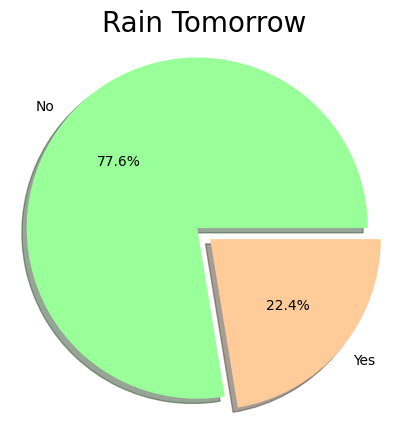

In [16]:
# pie chart for Rain Tomorrow
labels = ['No', 'Yes']
sizes = [df['RainTomorrow'].value_counts()[0], df['RainTomorrow'].value_counts()[1]]
explode = (0, 0.1)
colors = ['#99ff99','#ffcc99']
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Rain Tomorrow', fontsize=20)
plt.axis('equal')
plt.show()

Because the data is imbalance, we will use SMOTE to balance the data and use F1 score as the evaluation metrics

### **Feature Engineering**

#### **Generate hours, day, month, year from date**

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
#create a class to create new features called day,month and year
class DateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X['day'] = X['Date'].dt.day
        X['month'] = X['Date'].dt.month
        X['year'] = X['Date'].dt.year
        return X
    
#apply the class to the dataframe
get_feat = DateTransformer()
get_feat.fit_transform(df).head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,5,12,2008


## **F. Data Preprocessing**

### **Train Test Split**

In [18]:
X = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow'].map({'Yes':1,'No':0})

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((113754, 21), (28439, 21), (113754,), (28439,))

in our preprocesing we will make a pipeline to make our work easier. this preprocssing pipeline consist of 2 steps:
1. Imputation for missing value in numerical and categorical data
2. Encoding for categorical data using target encoder and for numerical data we will use standard scaler

In [19]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

num_col = X_train.select_dtypes(include="number").columns.tolist() + ["day","month","year"]
cat_col = X_train.select_dtypes(include="object").columns

num_pipe = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",PowerTransformer())
])

cat_pipe = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encoder",TargetEncoder(random_state=42))
])

preprocessor = ColumnTransformer([
    ("numeric",num_pipe,num_col),
    ("categoric",cat_pipe,cat_col)
],remainder = "drop",verbose_feature_names_out=False).set_output(transform='pandas')

prep_with_fe = Pipeline([
    ("get_feat",get_feat),
    ("preprocessor",preprocessor)
])

prep_with_fe.fit_transform(X_train,y_train)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,day,month,year,day,month,year,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
103642,1.106484,1.583621,-0.671369,1.212400,0.244460,-1.444152,-0.941694,-1.564111,-0.639771,-0.700959,1.123014,1.686527,1.030795,-1.717907,-0.311224,1.030795,-1.717907,-0.311224,0.196524,0.184743,0.149114,0.186775,0.156206
18697,-0.010580,-0.056179,0.012572,0.051232,-0.204412,0.457565,-0.009244,0.046613,0.410915,0.555773,-0.025163,-0.054097,-1.094453,0.511292,-1.083913,-1.094453,0.511292,-1.083913,0.263593,0.228317,0.261847,0.213702,0.155627
99305,0.144189,0.055832,-0.671369,0.354178,-1.566819,0.457565,-0.334815,-0.342252,-0.770774,-0.730610,-0.071283,0.234161,1.501963,1.282146,1.282624,1.501963,1.282146,1.282624,0.225243,0.236342,0.279849,0.194952,0.156520
142981,1.962377,1.401928,-0.671369,1.613831,0.648374,0.869373,0.272687,0.142780,-1.942124,-2.081014,1.875800,1.605872,-0.958582,-1.717907,0.878004,-0.958582,-1.717907,0.878004,0.181054,0.286828,0.251636,0.282572,0.156069
85572,0.497867,0.387590,-0.671369,-0.726080,-0.452277,-0.589044,-0.645875,-0.293251,1.077580,0.888609,0.674038,0.390892,-0.337178,1.282146,-0.311224,-0.337178,1.282146,-0.311224,0.219935,0.149899,0.161409,0.169877,0.156959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71785,0.051405,1.258132,-0.671369,-1.346473,0.026730,-1.137777,-1.354934,-1.617616,0.022590,-0.135197,0.658983,1.185034,0.835502,1.282146,-0.311224,0.835502,1.282146,-0.311224,0.108869,0.184942,0.146632,0.171924,0.155627
7835,1.663402,1.492955,-0.671369,1.212400,0.743914,1.066318,0.158780,-1.617616,-2.249651,-2.371087,1.316079,1.646231,0.430822,-1.328894,0.477516,0.430822,-1.328894,0.477516,0.131669,0.262443,0.309398,0.253797,0.156206
43164,-0.431991,-0.982733,1.751134,0.354178,0.743914,0.130119,0.864175,0.046613,0.171455,-0.194966,-0.318478,-0.054097,-0.576092,0.511292,-1.083913,-0.576092,0.511292,-1.083913,0.236385,0.224381,0.271441,0.212531,0.463632
120043,0.405891,1.007495,-0.671369,0.965826,0.026730,1.258052,-0.645875,-0.539487,0.290988,0.104381,0.869210,0.937285,-0.699972,1.282146,0.878004,-0.699972,1.282146,0.878004,0.189850,0.149899,0.196744,0.198178,0.156959


### **Smote for imbalanced data**

In [20]:
y_train.value_counts(normalize=True)

RainTomorrow
0    0.775814
1    0.224186
Name: proportion, dtype: float64

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy=0.8)

pipeline_smote = Pipeline([
    ('feat_eng',get_feat),
    ('preprocessor',preprocessor),
    ("smote",smote)
])

X_train_smote,y_train_smote = pipeline_smote.fit_resample(X_train,y_train)
X_train_smote.shape,y_train_smote.value_counts(normalize=True)

((158853, 23),
 RainTomorrow
 0    0.555558
 1    0.444442
 Name: proportion, dtype: float64)

## **G. Models Definition and Training**

Prepare a model that will be used to study the logistic regression (log_model) and support vector machine (SVM) (svm_model) relationships between features and a target variable with an emphasis on handling class imbalance, and training the models that has been created


### **Logistic Regression with smote** 

In [22]:
# First Modeling of Logistic Regression
lr1 = Pipeline([
    ('feat_eng',get_feat),
    ('preprocessor',preprocessor),
    ('smote',smote),
    ("algo",LogisticRegression(solver='liblinear',penalty='l1', random_state = 42))
])

lr1.fit(X_train,y_train)

Pipeline(steps=[('feat_eng', DateTransformer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Temp9am', 'Temp3p...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(random_state=42))]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.8)),
                ('algo',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [23]:
# Training first model of logistic regression
logpred1 = lr1.predict(X_test)

# Prediction results
logprob1 = lr1.predict_proba(X_test)
pd.DataFrame({
    "probability_yes_raintomorrow":logprob1[:,1] * 100,
    "probability_no_raintomorrow":logprob1[:,0] * 100,
    "prediction_raintomorrow":logpred1,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,logpred1)]
}).reset_index(drop=True)

,probability_yes_raintomorrow,probability_no_raintomorrow,prediction_raintomorrow,actual_raintomorrow,accuracy
0,24.061802,75.938198,0,0,True
1,59.541041,40.458959,1,1,True
2,59.987867,40.012133,1,0,False
3,9.609428,90.390572,0,0,True
4,5.337735,94.662265,0,0,True
...,...,...,...,...,...
28434,48.617383,51.382617,0,1,False
28435,24.274767,75.725233,0,1,False
28436,21.366877,78.633123,0,0,True
28437,92.391407,7.608593,1,1,True


### **Logistic Regression with class_weight = balanced**

In [24]:
# Secod Modeling of Logistic Regression (Parameter class_weight="balanced" is used  to deal imbalance prediction)
lr2 = Pipeline([
    ('feat_eng',get_feat),
    ('preprocessor',preprocessor),
    #('smote',smote),
    ("algo",LogisticRegression(solver='liblinear',penalty='l1',class_weight="balanced", random_state = 42))
])

lr2.fit(X_train,y_train)

Pipeline(steps=[('feat_eng', DateTransformer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Temp9am', 'Temp3p...
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(random_state=42))]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('algo',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    random_state=42, solver='liblinear'))])

In [25]:
# Training second model of Logistic Regression
logpred2 = lr2.predict(X_test)

# Akan ditampilkan hasil prediksinya
logprob2 = lr2.predict_proba(X_test)
pd.DataFrame({
    "probability_yes_raintomorrow":logprob2[:,1] * 100,
    "probability_no_raintomorrow":logprob2[:,0] * 100,
    "prediction_raintomorrow":logpred2,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,logpred2)]
}).reset_index(drop=True)

,probability_yes_raintomorrow,probability_no_raintomorrow,prediction_raintomorrow,actual_raintomorrow,accuracy
0,29.147762,70.852238,0,0,True
1,64.136301,35.863699,1,1,True
2,63.662406,36.337594,1,0,False
3,11.927515,88.072485,0,0,True
4,7.343900,92.656100,0,0,True
...,...,...,...,...,...
28434,57.365451,42.634549,1,1,True
28435,29.361206,70.638794,0,1,False
28436,25.325517,74.674483,0,0,True
28437,93.393011,6.606989,1,1,True


### **Logistic Regression Plain**

In [26]:
lr_plain = Pipeline([
    ('feat_eng',get_feat),
    ('preprocessor',preprocessor),
    ("algo",LogisticRegression(solver='liblinear',penalty='l1', random_state = 42))
])

lr_plain.fit(X_train,y_train)

Pipeline(steps=[('feat_eng', DateTransformer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Temp9am', 'Temp3p...
                                                   'month', 'year', 'day',
                                                   'month', 'year']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(random_state=42))]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('algo',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

### **Support Vector Machine with Smote**

In [27]:
# First Modeling of SVM

svm_smote = Pipeline([
    ('feat_eng',get_feat),
    ('preprocessor',preprocessor),
    ('smote',smote),
    ("algo",SVC(kernel='rbf',random_state=42))
])

svm_smote.fit(X_train,y_train)

Pipeline(steps=[('feat_eng', DateTransformer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Temp9am', 'Temp3p...
                                                   'month', 'year']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(random_state=42))]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.8)),
                ('algo', SVC(random_state=42))])

### **SVM with class_weight="balanced"**

In [28]:
# Second Modeling of SVM (Parameter class_weight="balanced" is used to deal inbalance predition)
svm2 = Pipeline([
    ('feat_eng',get_feat),
    ('preprocessor',preprocessor),
    #('smote',smote),
    ("algo",SVC(kernel='rbf',class_weight="balanced",random_state=42))
])

svm2.fit(X_train,y_train)

Pipeline(steps=[('feat_eng', DateTransformer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Temp9am', 'Temp3pm', 'day',
                                                   'month', 'year', 'day',
                                                   'month', 'year']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(random_state=42))]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('algo', SVC(class_weight='balanced', random_state=42))])

In [29]:
svm_plain = Pipeline([
    ('feat_eng',get_feat),
    ('preprocessor',preprocessor),
    ("algo",SVC(kernel='rbf',random_state=42))
])

svm_plain.fit(X_train,y_train)

Pipeline(steps=[('feat_eng', DateTransformer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Temp9am', 'Temp3pm', 'day',
                                                   'month', 'year', 'day',
                                                   'month', 'year']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(random_state=42))]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('algo', SVC(random_state=42))])

## **H. Models Evaluation**

Create a function to evaluate the models (Confusion Matrix)

### **Confusion Matrix - Logistic Regression**

In [30]:
logpred1 = lr1.predict(X_test)
logpred2 = lr2.predict(X_test)
logpred_plain = lr_plain.predict(X_test)
svm_smote_pred = svm_smote.predict(X_test)
svm2_pred = svm2.predict(X_test)
svm_plain_pred = svm_plain.predict(X_test)

### **Models Performance Score (Accuracy, Precision, Recall, and F1 score)**

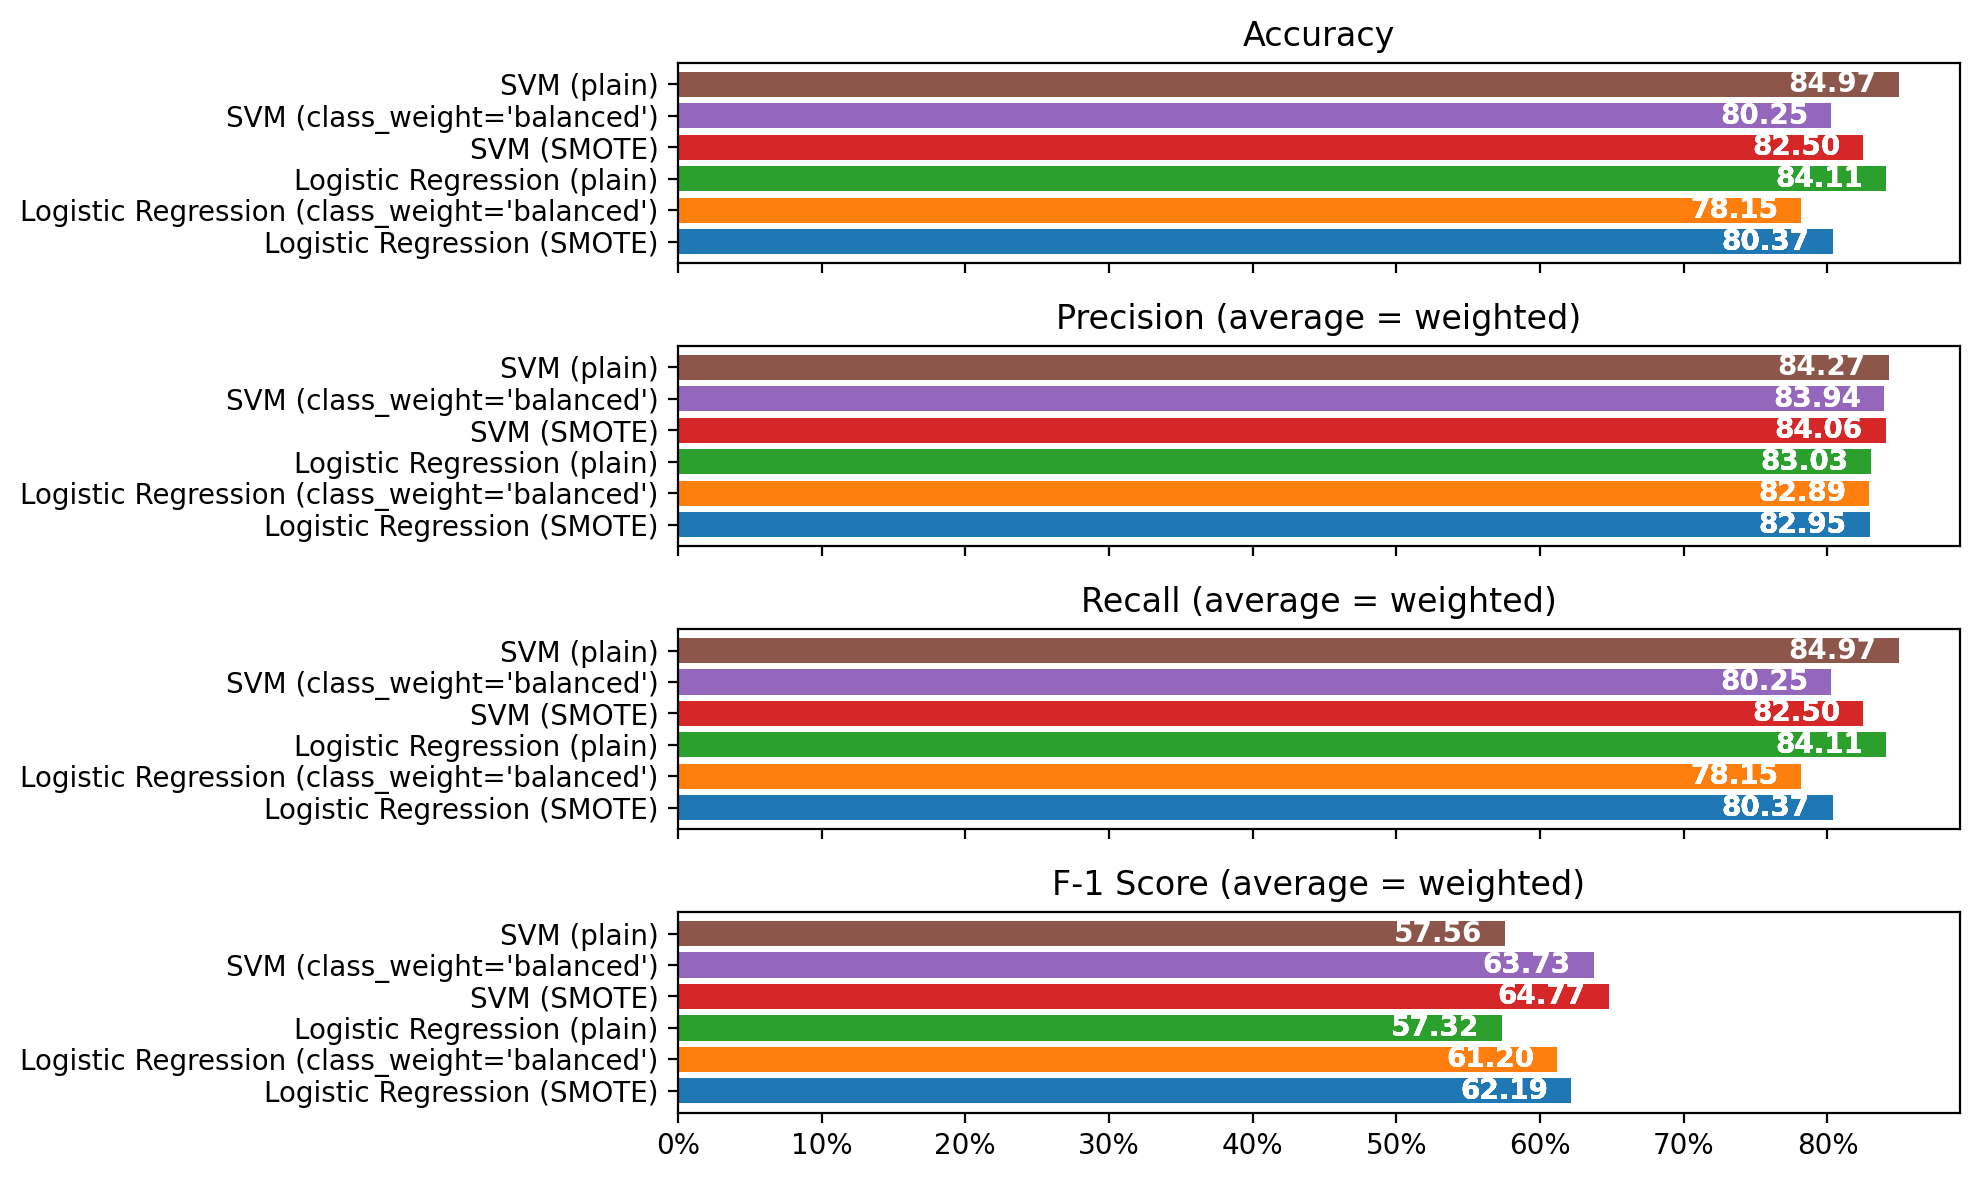

In [31]:
nrows,ncols = 4,1
fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i in range(nrows):
    for j,k,l in zip(
        [logpred1,logpred2,logpred_plain,svm_smote_pred,svm2_pred,svm_plain_pred],
        ["Logistic Regression (SMOTE)","Logistic Regression (class_weight='balanced')","Logistic Regression (plain)","SVM (SMOTE)","SVM (class_weight='balanced')","SVM (plain)"],
        ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b"]
    ):
        if i == 0:
            metric = accuracy_score(y_test,j) * 100
            title = "Accuracy"
        elif i == 1:
            metric = precision_score(y_test,j,average="weighted") * 100
            title = "Precision (average = weighted)"
        elif i == 2:
            metric = recall_score(y_test,j,average="weighted") * 100
            title = "Recall (average = weighted)"
        else:
            metric = f1_score(y_test,j) * 100
            title = "F-1 Score (average = weighted)"

        ax[i].barh(k,metric,color=l)
        ax[i].set_title(title)

        for container in ax[i].containers:
            ax[i].bar_label(container,fmt="%.2f",padding=-40,color="white",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))

plt.tight_layout()
plt.show()

Both models have a fairly high score for multiple metrics such as accuracy, precision, recall, and f-1 score. It can also be seen that the SVM model is slightly better than the Logistic Regression model, SVM with SMOTE has the highest score in F1 score, which is 64.77. Based on this result we will use SVM with SMOTE as our final model

### **Comparing Correct and Incorrect Predictions for Each Models**

After evaluating all models, the prediction results will be compared, namely the percentage of correct and incorrect prediction for each model.

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     22064
           1       0.59      0.72      0.65      6375

    accuracy                           0.82     28439
   macro avg       0.75      0.79      0.77     28439
weighted avg       0.84      0.82      0.83     28439



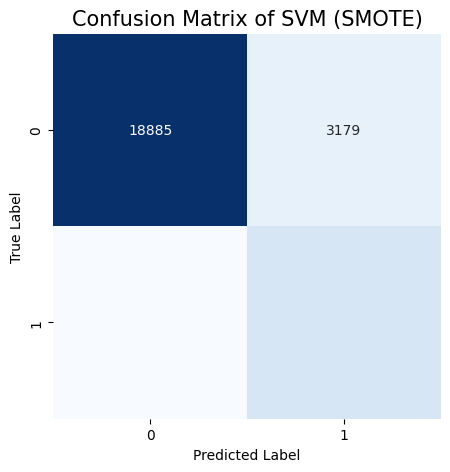

In [32]:
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, svm_smote_pred))
#plot confusion matrix of svm_smote_pred
cm = confusion_matrix(y_test, svm_smote_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of SVM (SMOTE)', fontsize=15)
#get percentage of confusion matrix

#set label to yes and no
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Based on the confusion matrix, we can see that the model is still have a lot of false positive rather than false negative. to overcome this problem, we can try to use another model or try to tune the hyperparameter of the model or try to use another sampling method.

### **Save the model**

In [33]:
import pickle
from pickle import dump,load
dump(svm_smote, open('svm_smote.pkl', 'wb'))

## **I. Models Inference**

In [34]:
# Data baru yang selanjutnya akan dimodelkan
test_data = X_test.iloc[0:4,:]
test_data

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,day,month,year
48872,2017-01-26,Canberra,15.1,32.9,0.0,E,50.0,E,W,7.0,11.0,73.0,32.0,1015.5,1011.8,19.0,30.3,No,26,1,2017
100864,2012-09-12,MountGambier,8.4,16.2,0.0,WSW,46.0,N,W,28.0,28.0,45.0,74.0,1011.3,1011.9,13.7,14.6,No,12,9,2012
123233,2015-11-06,Perth,17.0,24.7,0.0,SW,39.0,S,SSW,13.0,20.0,56.0,57.0,1007.1,1003.7,21.4,24.2,No,6,11,2015
7228,2012-04-24,Cobar,12.3,18.8,0.0,WSW,39.0,SW,W,19.0,20.0,51.0,29.0,1017.7,1015.6,12.9,18.0,No,24,4,2012


In [35]:
model = pickle.load(open('svm_smote.pkl', 'rb'))
model.predict(test_data)

array([0, 1, 1, 0], dtype=int64)

## **J. Conclusion**

Based on the analysis above, it can be seen that both Logistic Regression and SVM models have a fairly high accuracy and both can handle the problem of imbalance prediction (by adding the smote method) well, indicated by a high percentage of correct predictions (true Yes and true No). In addition, both models also have high scores for multiple metrics such as accuracy, precision, recall, and f-1 score. The model to be selected should also be adjusted to its implementation in the field or sector to be applied. Because each model produces a different percentage of correct predictions in the confusion matrix so that it can be a consideration for choosing the model to be used. After the overall analysis, it can be concluded that the best model to predict Rain in Australia is Support Vector Machine.